<p align="center">
  <img src="breast_cancer.png" width="800"">
</p>

  # **Breast Cancer Prediction using Machine Learning**


<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author:Adina Abrar</h1>


<p align="center">
  <a href="https://www.linkedin.com/in/adina-abrar" target="_blank">
    <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/linkedin/linkedin-original.svg" width="45" style="margin: 0 10px;"/>
  </a>
  <a href="https://www.kaggle.com/adinaabrar" target="_blank">
    <img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" width="45" style="margin: 0 10px;"/>
  </a>
  <a href="https://github.com/Adina-Abrar" target="_blank">
    <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/github/github-original.svg" width="45" style="margin: 0 10px;"/>
  </a>
  <a href="mailto:adinaabrar1111@gmail.com">
    <img src="https://upload.wikimedia.org/wikipedia/commons/4/4e/Gmail_Icon.png" width="45" style="margin: 0 10px;"/>
  </a>
</p>


# 🎯 **Aims and Objectives**

The aim of this notebook is to **build a Machine Learning model** that can accurately **predict whether a breast tumor is malignant or benign** based on various medical diagnostic measurements.

## 🟡 **Aims**
- To apply data preprocessing, cleaning, and visualization techniques on a real medical dataset.  
- To explore relationships between tumor characteristics and diagnosis outcomes.  
- To train and evaluate different machine learning algorithms for disease prediction.  
- To demonstrate the practical workflow of an ML Engineer — from raw data to a working predictive model.

#  **Dataset — Overview**

## 📌  Dataset Information

- **Dataset Name:** Breast Cancer Wisconsin (Diagnostic)  
- **Source:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))  
- **Original Donor:** Dr. William H. Wolberg, University of Wisconsin Hospitals, Madison  
- **Number of Instances:** 569  
- **Number of Features:** 30 numeric features + 1 ID column + 1 diagnosis column  
- **Objective:** Classify tumors as **Malignant (M)** or **Benign (B)** based on characteristics of cell nuclei.

This dataset contains measurements derived from a digitized image of a fine needle aspirate (FNA) of a breast mass. Features describe properties of the cell nuclei present in the image.



## 🧠  Column Descriptions

| Column Name                | Description |
|----------------------------|-------------|
| `id`                       | Unique identifier number for each patient/sample |
| `diagnosis`                | Target variable: **M = Malignant**, **B = Benign** |
| `radius_mean`              | Mean of distances from center to points on the perimeter |
| `texture_mean`             | Standard deviation of gray-scale values (texture) |
| `perimeter_mean`           | Mean size of the core tumor perimeter |
| `area_mean`                | Mean area of the tumor |
| `smoothness_mean`          | Mean of local variation in radius lengths |
| `compactness_mean`        | Mean of (perimeter² / area - 1.0) |
| `concavity_mean`          | Mean severity of concave portions of the contour |
| `concave points_mean`    | Mean number of concave portions of the contour |
| `symmetry_mean`           | Mean symmetry |
| `fractal_dimension_mean` | Mean of “coastline approximation” — how complex the tumor border is |

For each of these 10 measurements, **three different statistics are recorded**:
- `_mean` → Mean value  
- `_se` → Standard error  
- `_worst` → “Worst” or largest mean value among the three largest values

So, the complete list of features includes:



# **Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# **Loading The Dataset**

In [3]:
df = pd.read_csv(r'E:\ML_Projects\Projects\Disease_Prediction_Using_Medical_Data\Data\breast_cancer.csv')


# **Dataset Inspection**

In [4]:
#Check shape (rows, columns)
print("Dataset shape:", df.shape)

# Check column info
print("\nDataset Info:")
print(df.info())

# Check first few rows
df.head()

Dataset shape: (569, 33)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null   

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **Data Cleaning**

## Droping Unnecessary Columns

In [5]:
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.shape


(569, 31)

Before training our machine learning model, we clean the dataset to remove unnecessary columns:

1. **`id` column**  
   - This column is only an identifier and does not help in prediction.  
   - We will drop it.


2. **`Unnamed: 32` column**  
   - This column contains only `NaN` values.  
   - We will remove it because it doesn’t provide any useful information.

## Checking for Missing Values

In [6]:
print("🔸 Missing values per column:")
print(df.isnull().sum())

🔸 Missing values per column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


#### **Observations** :
   - After checking with `df.isnull().sum()`, we observed that **no columns contain missing values**.  
   - This means there is no need for imputation or row removal due to null entries.  

## Outlier Detection

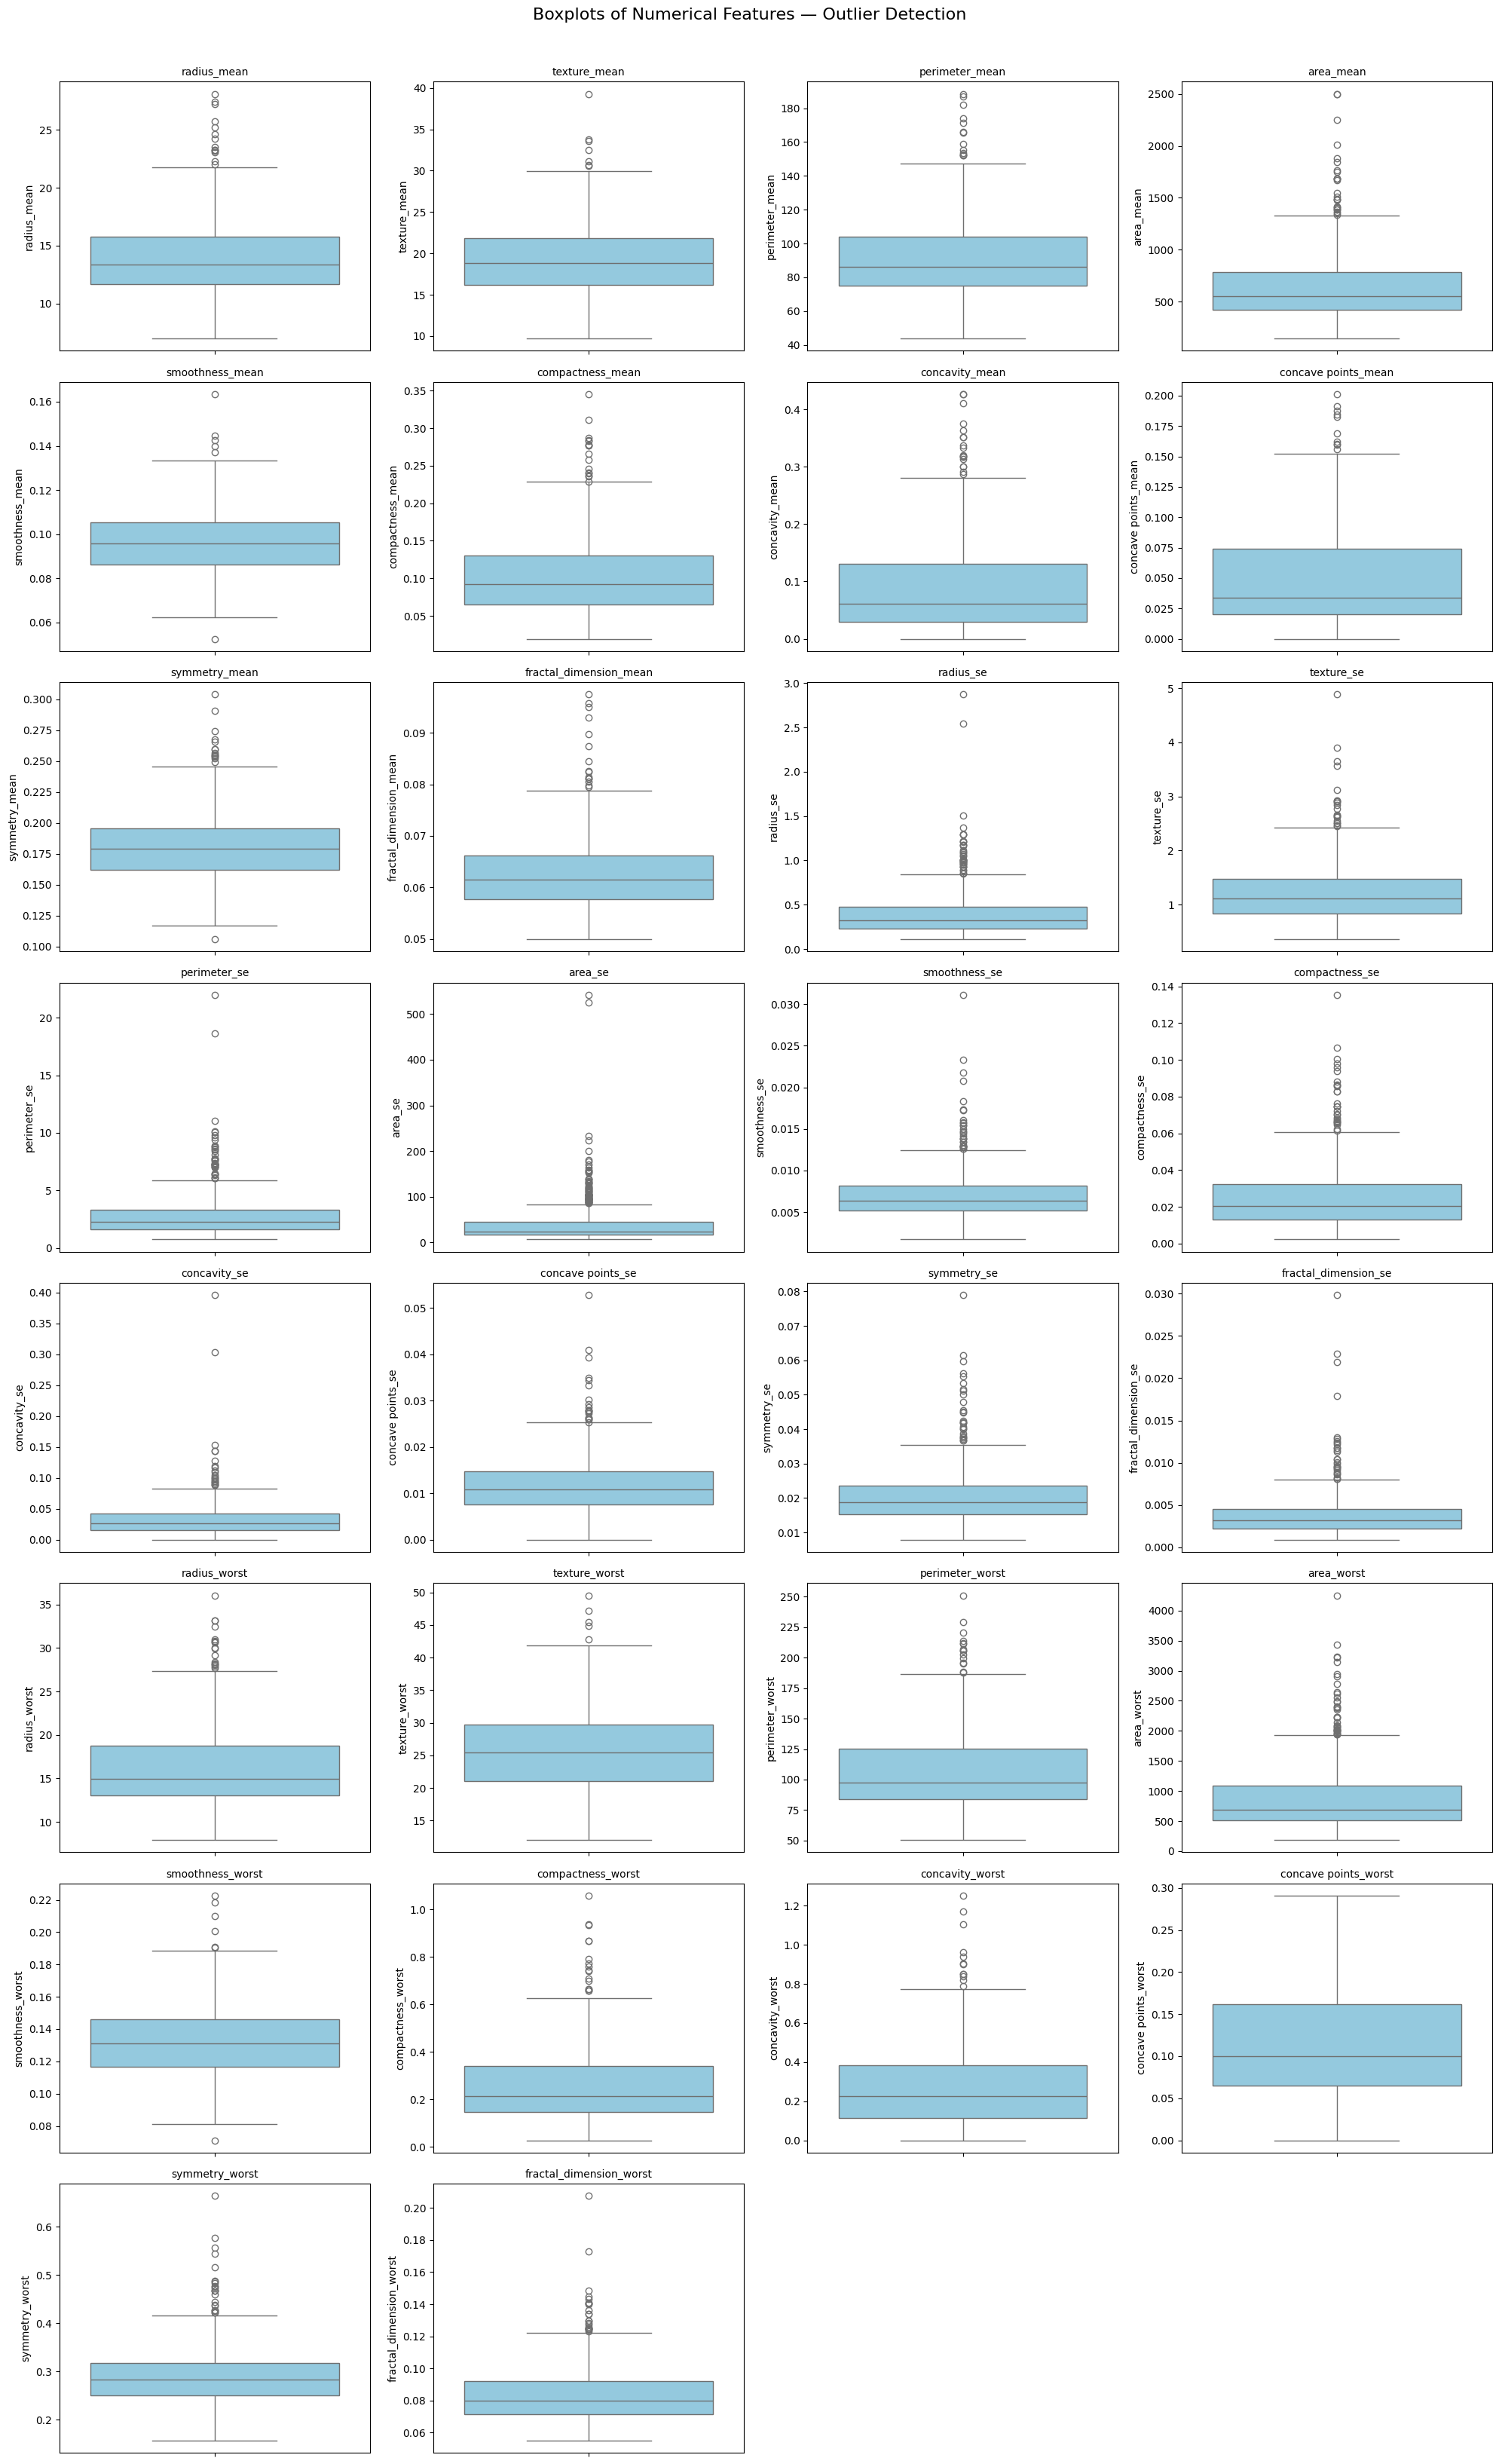

In [7]:
num_cols = df.select_dtypes(include=[np.number]).columns

# Define grid layout
n_cols = 4  # Number of boxplots per row
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.suptitle("Boxplots of Numerical Features — Outlier Detection", fontsize=16, y=1.02)
plt.show()

### 📝 **Observations — Boxplots**

- Many numerical features show **visible outliers**, especially tumor size–related features such as `radius_mean`, `perimeter_mean`, and `area_mean`.  
- These outliers likely represent **large tumor measurements**, which are clinically important, not data entry errors.  
- Since these extreme values contain **valuable information for classification**, we will **not remove them** but will handle them carefully during **feature scaling**.


## Checking Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

#### **Observations** :

   - We used `df.duplicated().sum()` to detect duplicates.  
   - The result showed **0 duplicate rows**, meaning there are no repeated entries in the dataset.

# **Exploratory Data Analysis (EDA) 🧠📊**

In this section, we aim to:
- Understand the overall `structure` of the Breast Cancer dataset  
- Explore the `distribution` of numerical features  
- Examine the class distribution of the target variable (`diagnosis`)  
- Analyze `relationships` between key features and the diagnosis  
- Identify` potential outliers, skewness, or imbalance`  
- Gather insights that will guide data preprocessing and model building

## Descriptive Statistics


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### 📝 Observations:

- All features have **569 non-null values**, confirming there are **no missing values** in the dataset after cleaning. ✅  
- Features like `radius_mean`, `perimeter_mean`, and `area_mean` have **high standard deviations**, indicating significant variability among samples.  
- Some features (e.g., `area_worst`, `perimeter_worst`) have **very large max values** compared to their mean and quartiles, suggesting the **presence of outliers**.  
- Features such as `smoothness_mean` and `fractal_dimension_mean` have **very small ranges** and low variability, implying they are more tightly distributed.  
- For skewed distributions, the **mean is often larger than the median** (e.g., `area_mean`, `concavity_mean`), which confirms **right skewness** observed in histograms.  
- Quartile values show that most data points are concentrated in lower ranges, with a **long tail on the right** for several features. This supports the earlier KDE visualization findings.  
- This summary is helpful for deciding preprocessing steps such as **normalization**, **standardization**, or **outlier treatment** before model training.


## Class Distribution of Target (Diagnosis)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19260\2001360043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


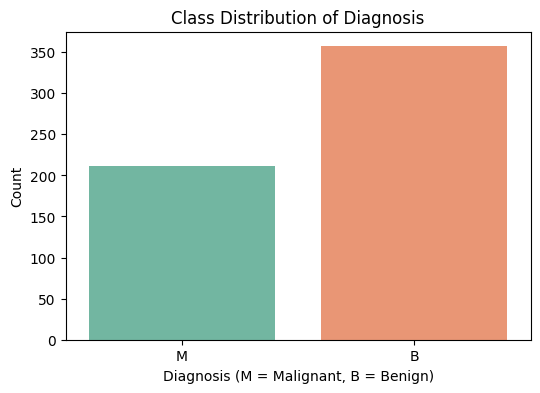

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Class Distribution of Diagnosis')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()


df['diagnosis'].value_counts()

### 📌 Observations — Target Variable (`diagnosis`)

- The dataset contains a total of **569 samples**, out of which:  
  - **357 samples (62.75%)** are **Benign (B)**  
  - **212 samples (37.25%)** are **Malignant (M)**

- There is a **moderate class imbalance**, with **Benign tumors being the majority class**.  
- This imbalance is not extreme, but it's still important to keep in mind, as it may influence model performance and evaluation metrics.  
- When training models, we may consider using **stratified sampling** or appropriate evaluation metrics (e.g., Precision, Recall, F1-score) to handle this imbalance effectively.


## Numerical Feature Distributions

C:\Users\DELL\AppData\Local\Temp\ipykernel_19260\44187930.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\DELL\miniconda3\envs\python_ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


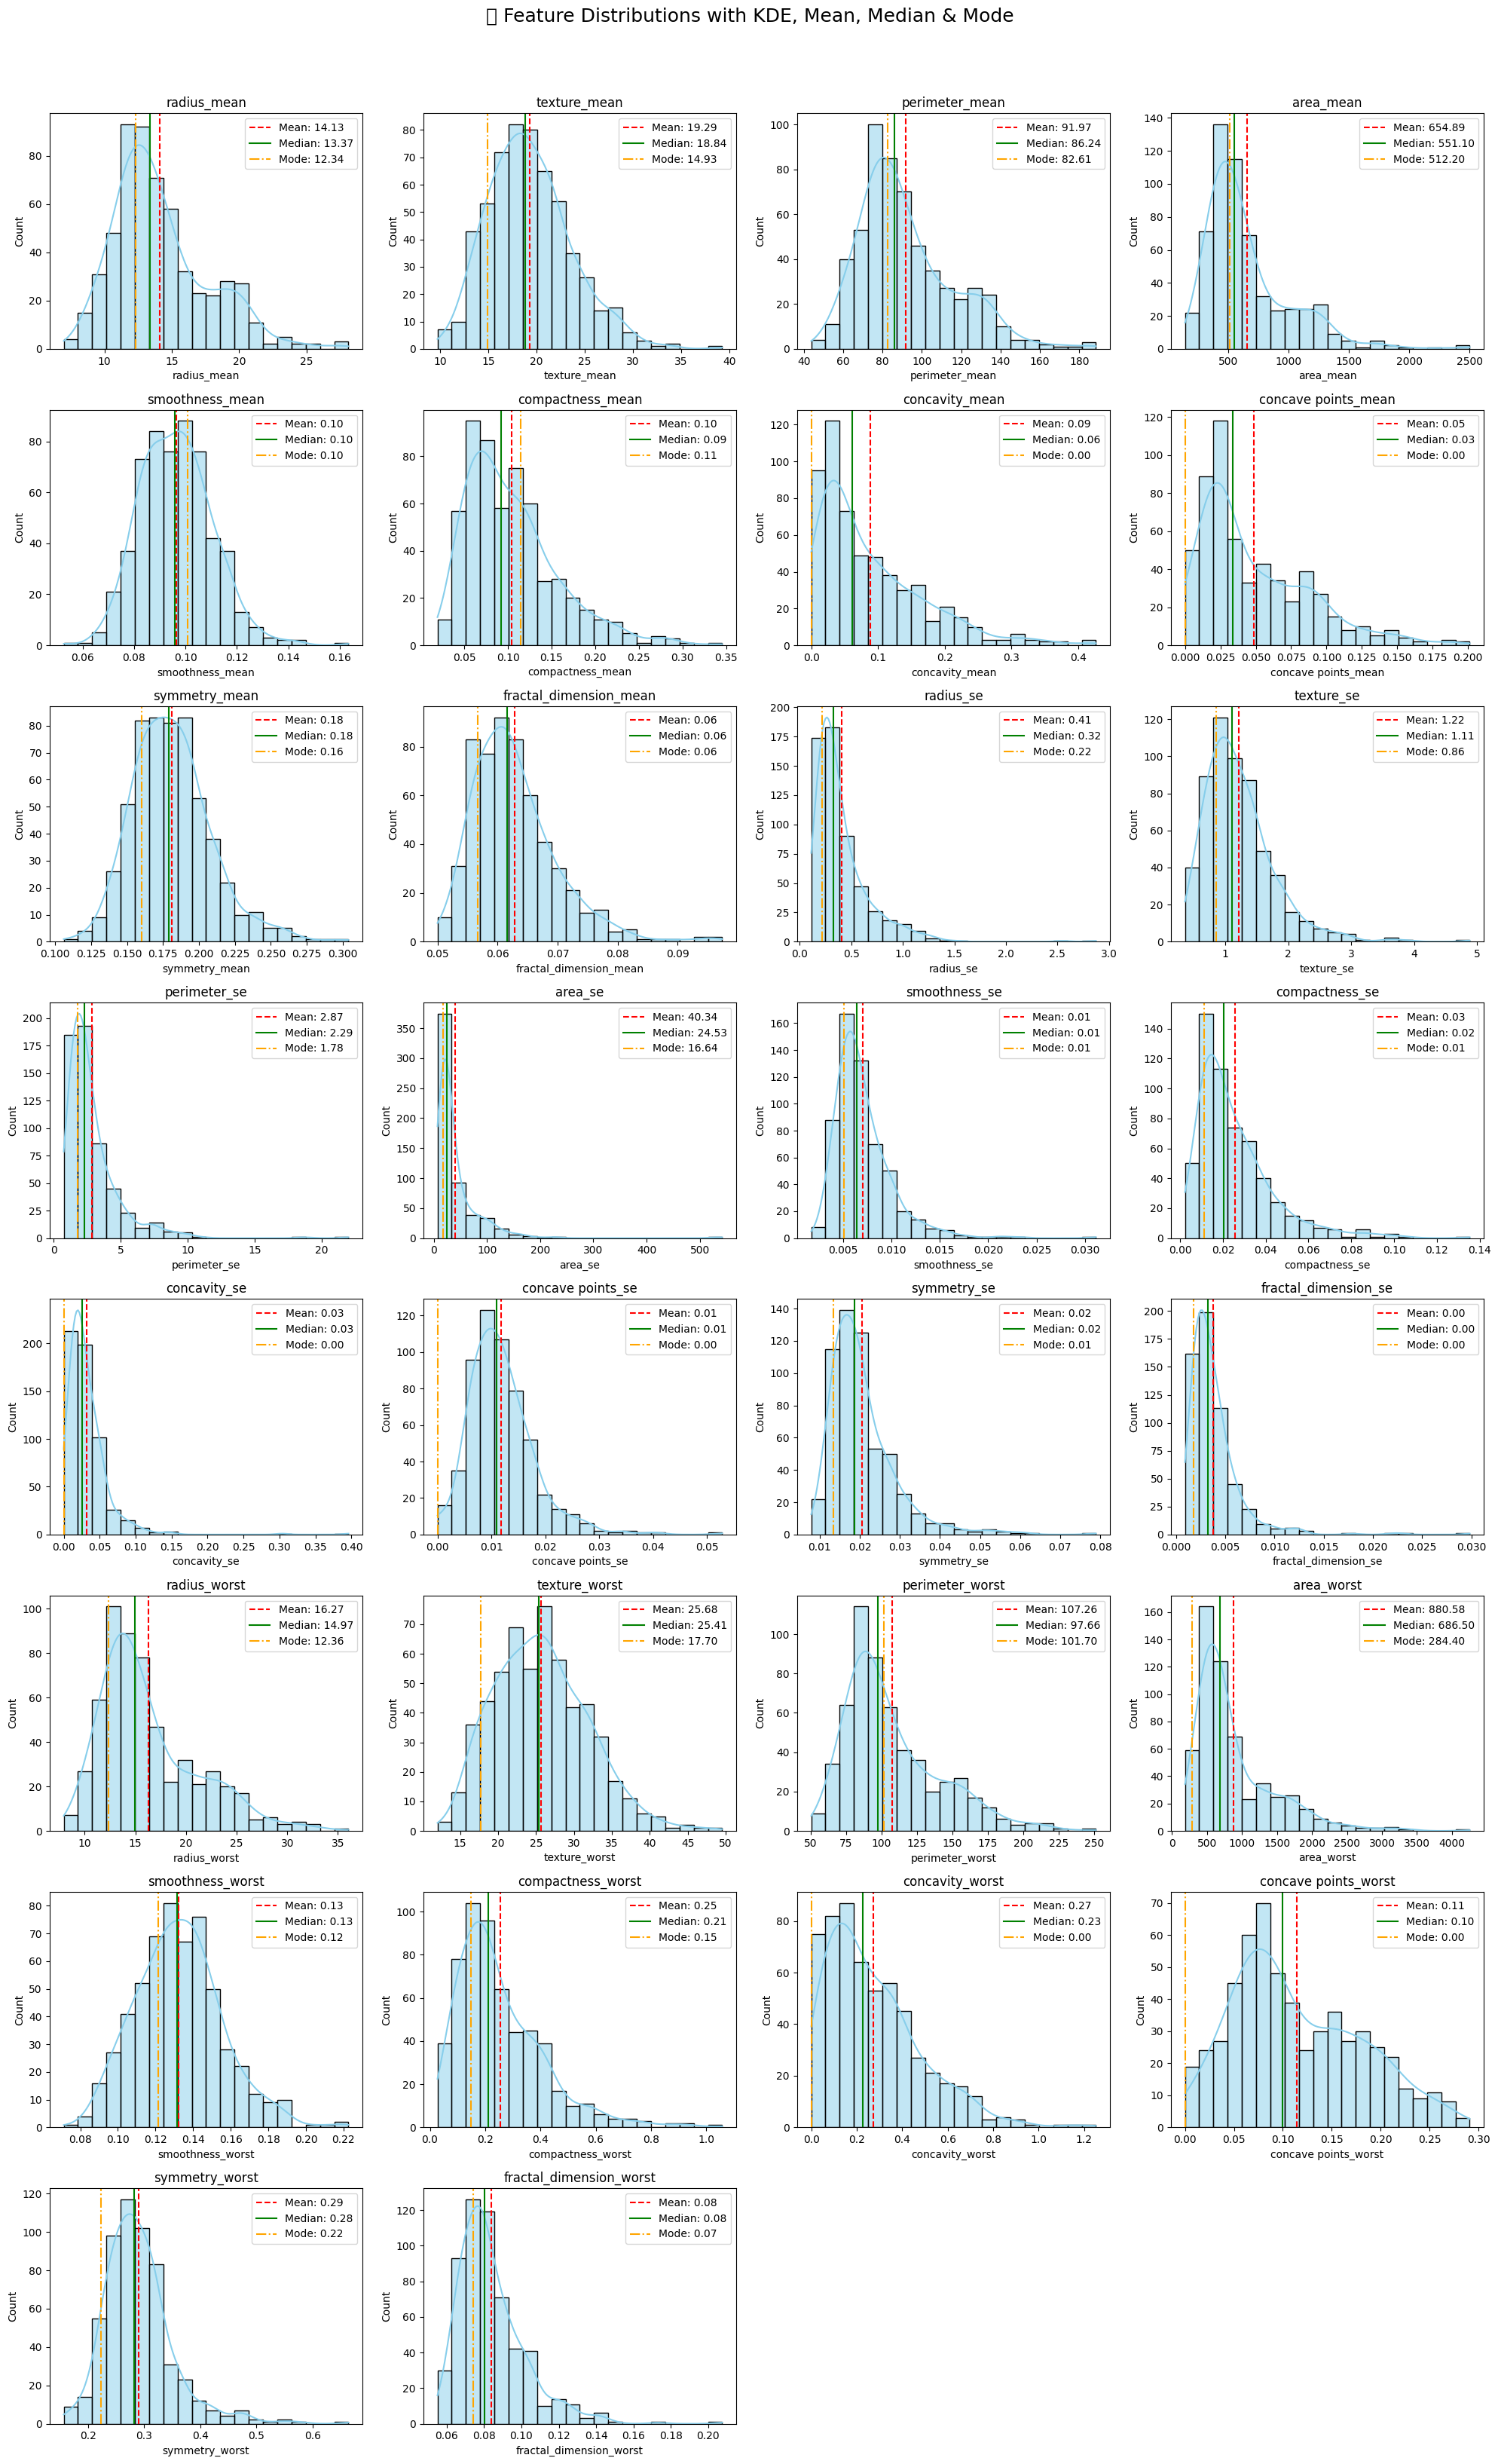

In [11]:
# Select only numeric columns for plotting
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Set up grid layout
n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(20, 4 * n_rows))
plt.suptitle('📊 Feature Distributions with KDE, Mean, Median & Mode', fontsize=18, y=1.02)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Plot histogram with KDE
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    
    # Calculate stats
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]  # mode() returns a Series
    
    # Plot mean, median, mode lines
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_val:.2f}')
    plt.axvline(mode_val, color='orange', linestyle='-.', linewidth=1.5, label=f'Mode: {mode_val:.2f}')
    
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

### 📊 Numerical Feature Distributions

The histograms above display the **distribution of all numerical features** in the Breast Cancer dataset.  
For each feature, we have visualized:
- **Histogram** to show frequency distribution  
- **KDE (Kernel Density Estimation)** curve to represent the probability density  
- **Mean (red dashed line)**  
- **Median (green dashed line)**  
- **Mode (yellow dashed line)**  

**📝 Observations**:
- Most features show **right-skewed distributions** (e.g., `area_mean`, `perimeter_mean`, `concavity_mean`), indicating that most patients have lower values while a few have significantly higher values.  
- A few features such as `smoothness_mean` and `symmetry_mean` are **approximately normally distributed**, which might help some algorithms that assume normality.  
- There are noticeable differences between **mean**, **median**, and **mode** in skewed features, confirming the presence of outliers and skewness.  
- Feature scaling or transformations (e.g., **log transformation**, **standardization**) may be beneficial before training models.  
- Outlier treatment might also be considered for highly skewed features to improve model performance.

This step helps us understand the **underlying data distribution**, which is crucial for selecting appropriate preprocessing techniques and ML algorithms.


## Melignant vs Benign Stacked Histogram

c:\Users\DELL\miniconda3\envs\python_ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


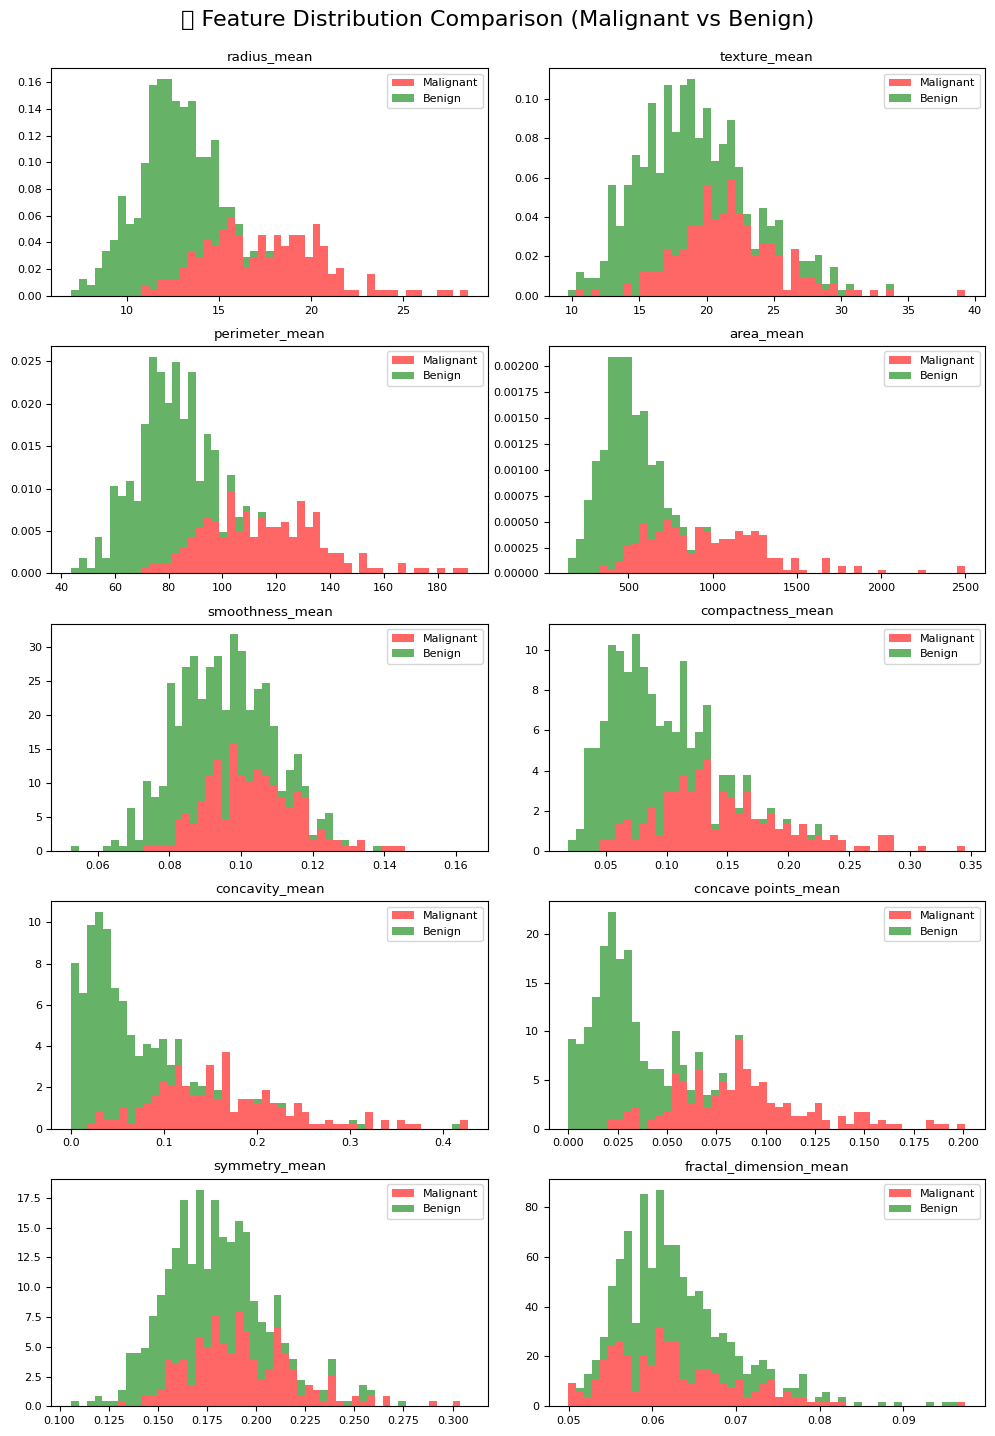

In [12]:
# Define the features to compare (usually *_mean)
features_mean = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

# Separate malignant and benign subsets
dfM = df[df['diagnosis'] == 'M']
dfB = df[df['diagnosis'] == 'B']

# Plot
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 14))
axes = axes.ravel()

for idx, ax in enumerate(axes):
    feature = features_mean[idx]
    
    # Compute dynamic bin width
    min_val = df[feature].min()
    max_val = df[feature].max()
    binwidth = (max_val - min_val) / 50
    bins = np.arange(min_val, max_val + binwidth, binwidth)
    
    # Stacked histogram
    ax.hist(
        [dfM[feature], dfB[feature]],
        bins=bins,
        density=True,            
        stacked=True,
        alpha=0.6,
        color=['red', 'green'],
        label=['Malignant', 'Benign']
    )
    
    ax.set_title(feature)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.suptitle('📌 Feature Distribution Comparison (Malignant vs Benign)', fontsize=16, y=1.02)
plt.show()


### 📊 Feature Distribution Comparison by Diagnosis

We plotted stacked histograms for the **mean features** to compare their distributions between **Malignant (M)** and **Benign (B)** tumors.

- Red = Malignant  
- Green = Benign

This visualization helps identify which features provide good separation between classes.  
For example, features like `radius_mean` or `area_mean` often show clear differences between M and B, making them strong predictors for the model.


## Correlation Matrix

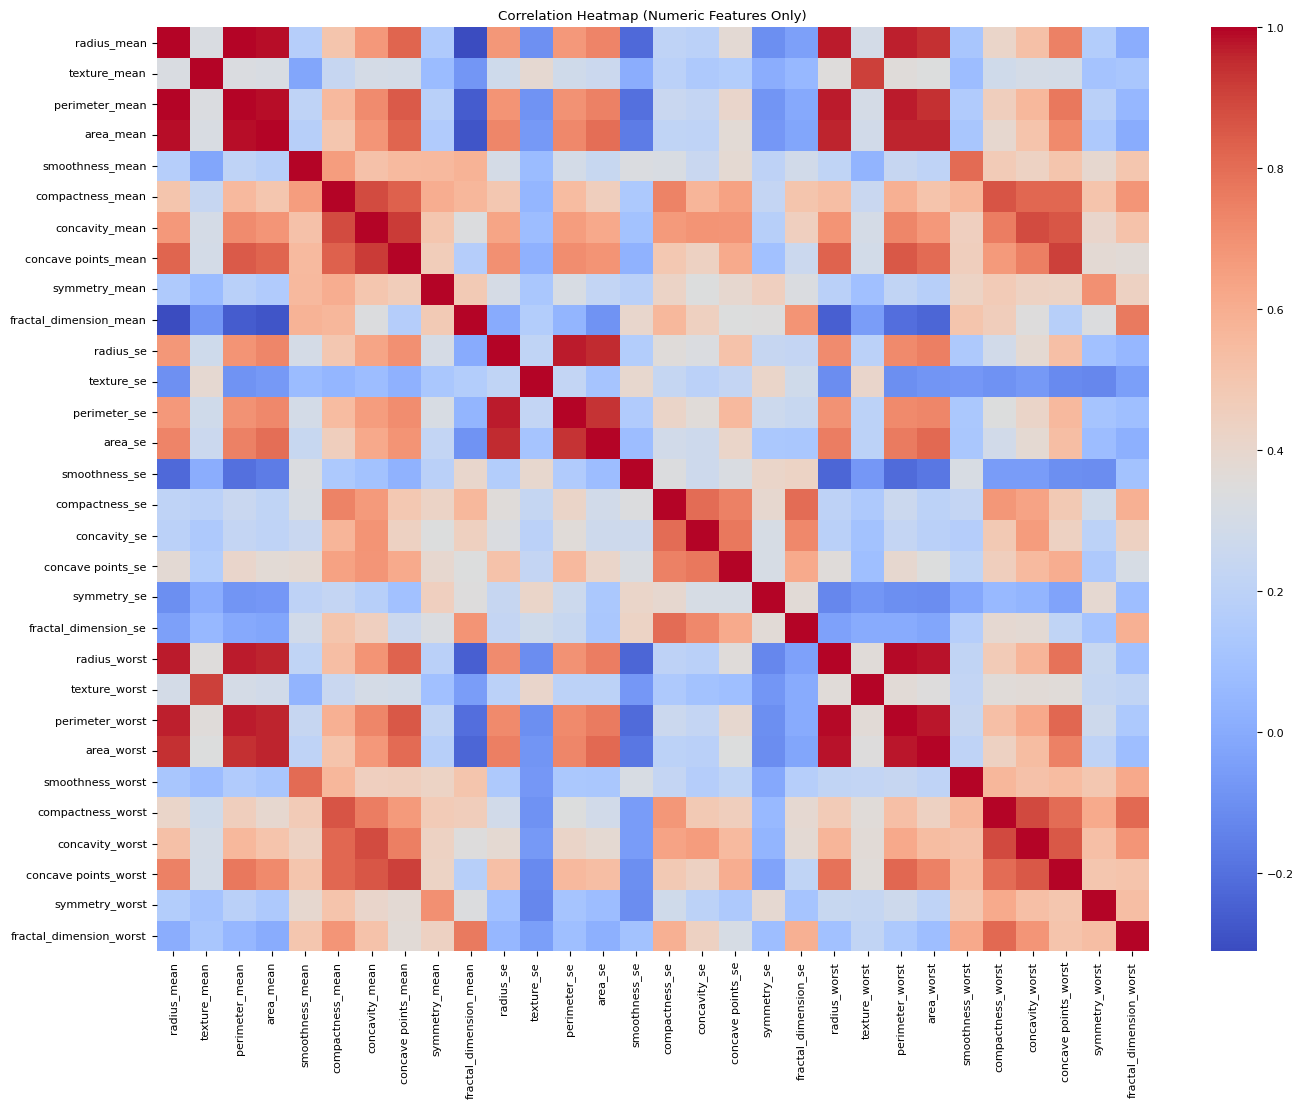

In [13]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(16,12))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

### 📝 **Observations — Correlation Matrix**

- Several **features show strong positive correlations**, especially among the “_mean_”, “_worst_”, and “_se_” feature groups. For example:  
  - `radius_mean`, `perimeter_mean`, and `area_mean` are highly correlated with each other.  
  - Similarly, `radius_worst`, `perimeter_worst`, and `area_worst` form another strong correlation cluster.  
- The **diagonal of the matrix shows a perfect correlation (1.0)** since each feature is correlated with itself.  
- **Texture-related features** display moderate correlations with other features, indicating they provide somewhat unique information.  
- Some “_se_” (standard error) features exhibit **weaker correlations**, suggesting they might add additional variance and could be useful in model training.  
- Strong correlations between certain features indicate **multicollinearity**, which may require handling through feature selection or dimensionality reduction (e.g., PCA) during modeling.  
- Overall, the matrix reveals that **groups of related features are strongly correlated**, which is typical in medical datasets where multiple measurements describe related physical characteristics.


##  Feature vs Target Visualization

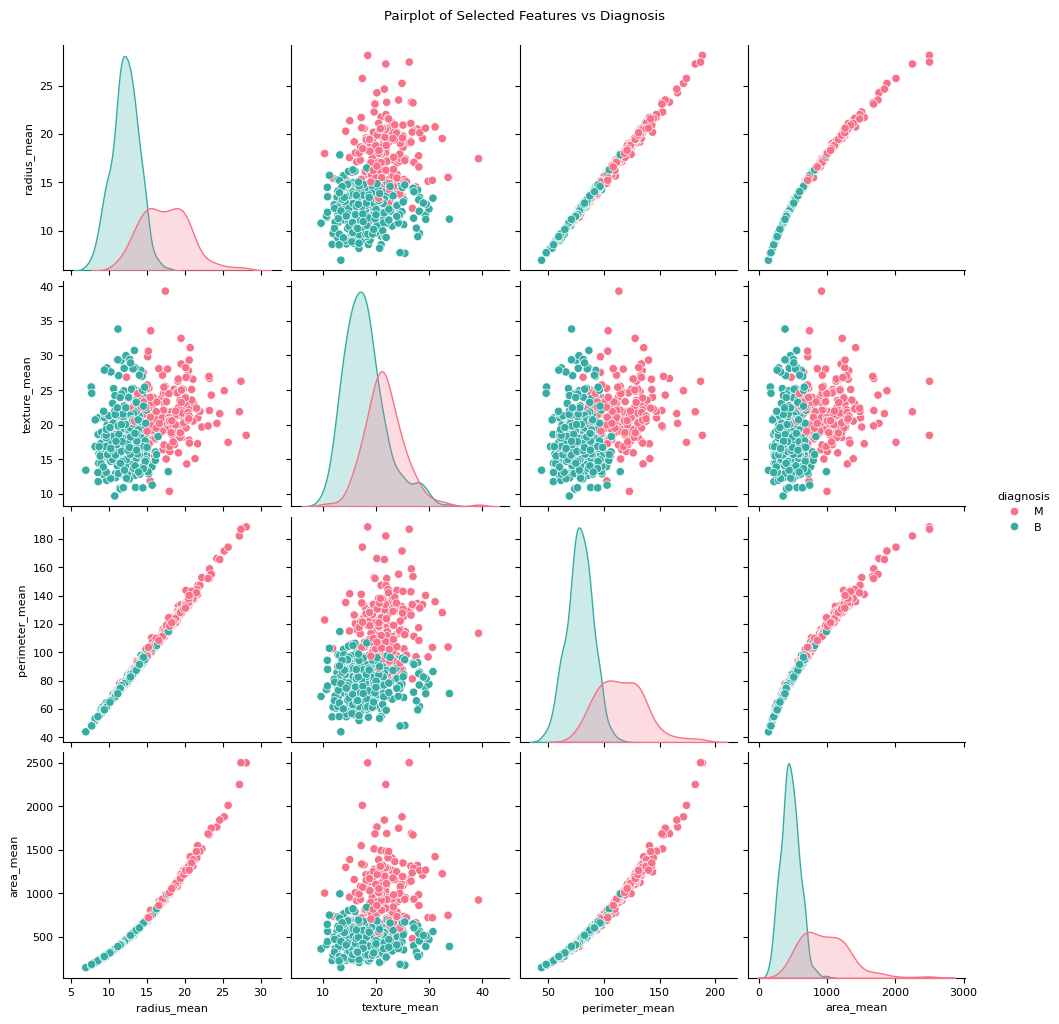

In [14]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
sns.pairplot(df, vars=selected_features, hue='diagnosis', palette='husl')
plt.suptitle('Pairplot of Selected Features vs Diagnosis', y=1.02)
plt.show()

### 📝 **Observations — Pairplot of Selected Features**

- The pairplot provides a clear **visual comparison between different feature pairs** (`radius_mean`, `texture_mean`, `perimeter_mean`, and `area_mean`) with respect to the target variable **`diagnosis`**.  
- There is a **strong separation between malignant (M) and benign (B)** cases, especially for features like `radius_mean`, `perimeter_mean`, and `area_mean`.  
  - Malignant cases tend to cluster towards **higher values** for these features.  
  - Benign cases are more concentrated in the lower range.  
- `texture_mean` shows a **moderate separation**, indicating it also contributes to distinguishing between the two classes, though less strongly compared to the other features.  
- Scatter plots between features (off-diagonal plots) show **clear linear relationships** between `radius_mean`, `perimeter_mean`, and `area_mean`, confirming their **high correlation** observed in the correlation matrix.  
- Overall, these features are **good candidates for classification**, as they show **clear class boundaries** and strong mutual relationships.


# **Data Pre-Processing**

Data preprocessing ensures the dataset is **clean, consistent, and ready for modeling**.  
In this step, we perform **feature scaling and encoding**, preparing the numerical and categorical features for machine learning algorithms.  
Proper preprocessing improves **model accuracy, stability, and training efficiency**.

## ⚖️ Feature Scaling

Before training the machine learning models, it is crucial to bring all numerical features to a similar scale.
This step ensures that no single feature dominates due to its scale, and algorithms like SVM and Logistic Regression perform optimally.

In [15]:
df_scaled = df.copy()
scalers = {}
feature_cols = df.columns.drop('diagnosis')

for col in feature_cols:
    scaler = StandardScaler()
    df_scaled[col] = scaler.fit_transform(df[[col]])
    scalers[col] = scaler

df_scaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### 📝 **Observations — Feature Scaling**

- **Feature scaling** was applied using `StandardScaler`, which standardizes each feature to have a **mean of 0** and **standard deviation of 1**.  
- A **separate scaler** was stored for each feature, allowing for **easy reverse transformation** later (useful for interpretation or visualization).  
- Scaling ensures that all features are **on a comparable scale**, preventing features with large magnitudes from **dominating** model training.  



## 🔠 Encoding the Categorical Feature — `diagnosis`

In [16]:
label_encoder = LabelEncoder()

# Encode the diagnosis column
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Verify encoding
print(df['diagnosis'].value_counts())
print("\nEncoded classes:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


diagnosis
0    357
1    212
Name: count, dtype: int64

Encoded classes: {'B': np.int64(0), 'M': np.int64(1)}


### 📝 **Observations — Encoding**

- The `diagnosis` feature was **successfully encoded** into binary values.  
- `0` represents **Benign (B)** cases, and `1` represents **Malignant (M)** cases.  
- This numerical format allows ML models to **interpret the target variable** correctly during training.


# **Model Building**

## Train-Test Split

In [17]:
X = df.drop('diagnosis', axis=1)   # Replace 'target' with your actual target column name
y = df['diagnosis']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shape of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (455, 30)
Testing set shape: (114, 30)
